<a href="https://colab.research.google.com/github/GabrielaRomoM/EjerciciosSYS-Python/blob/main/LAPLACE/Cuaderno4_inverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Ejemplo - Tranformada inversa de una transformada racional de Laplace

Determine la transformada inversa $x(t) = \mathfrak{L}^{-1} \{ X(s) \}$ de:

\begin{equation}
X(s) = \frac{2 s^2 + 14 s + 124}{s^3 + 8 s^2 + 46 s + 68} \qquad \text{for } \Re \{s \} > -2
\end{equation}

Primero se define la función $X(s)$ con `SymPy`.

In [4]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (2*s**2 + 14*s + 124)/(s**3 + 8 * s**2 + 46*s + 68)
X

     2               
  2⋅s  + 14⋅s + 124  
─────────────────────
 3      2            
s  + 8⋅s  + 46⋅s + 68

Los polos de $X(s)$ son obtenidos al calcular las raices del polinomio del denominador.

In [ ]:
poles = sym.roots(sym.denom(X))
poles

El resultado es un polo real y un par de polos complejos conjugados. De acuerdo a la clasificación de polos, se escoge el siguiente método de fracciones parciales:

\begin{equation}
X_p(s) = \frac{A}{s + 2} + \frac{B s + C}{s^2 + 6s + 34}
\end{equation}

Los coeficientes $A, B, C \in \mathbb{R}$ son obtenidos al igualar los coeficientes con $X(s)$.

In [ ]:
A, B, C = sym.symbols('A B C', real=True)
#expresión en fracciones parciales
Xp = A / (s+2) + (B*s + C)/(s**2 + 6*s + 34)
#resolver coeficientes por igualación de expresiones
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

Al reemplazar los coeficientes en $X_p(s)$ resulta en:

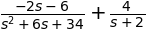

In [ ]:
Xp = Xp.subs(coeffs)
Xp

La primera fracción pertenece a los polos complejos conjugados. Al [completar el cuadrado](https://en.wikipedia.org/wiki/Completing_the_square) en el denominador, su inversa puede ser identificada en la tabla de transformadas como una señal coseno que decrece exponencialmente. Realizando la transformada inversa de Laplace con `SymPy`:

In [ ]:
x1 = sym.inverse_laplace_transform(Xp.args[1], s, t) #trasformada inversa del segundo componente
x1

La segunda fracción corresponde a un polo real de primer orden. Su transformada inversa de Laplace se puede hallar en la tabla de transformadas, la cual es una señal exponencial que decae. Realizando la transformada inversa de Laplace con `SymPy`:

In [ ]:
x2 = sym.inverse_laplace_transform(Xp.args[0], s, t)#transformada inversa del primer componente
x2

La transformada inversa de Laplace de $X(s)$ está dada por la suma de las dos partes descritas anteriormente:

In [ ]:
x = x1 + x2
x

Se grafican los resultados:

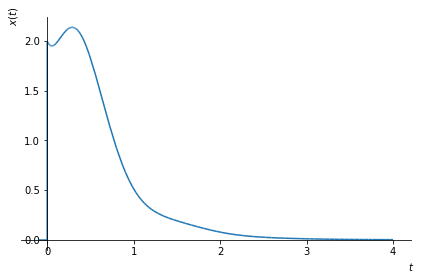

In [ ]:
sym.plot(x, (t, -0.1, 4), xlabel='$t$', ylabel='$x(t)$');

El mismo resultado se puede obtener directamente de $X(s)$ usando la transformada inversa de Laplace de `SymPy`:

Nota: la operación inversa de simpy puede ser costosa computacionalmente, se sugiere utilizar fracciones parciales para simplificar los cálculos.

In [ ]:
sym.inverse_laplace_transform(X, s, t).simplify() #sin embargo puede ser más costoso computacionalmente

**Ejercicio**

* Obtener la transformada inversa de Laplace de $X(s)$ manualmente.

 **SOLUCIÓN**

 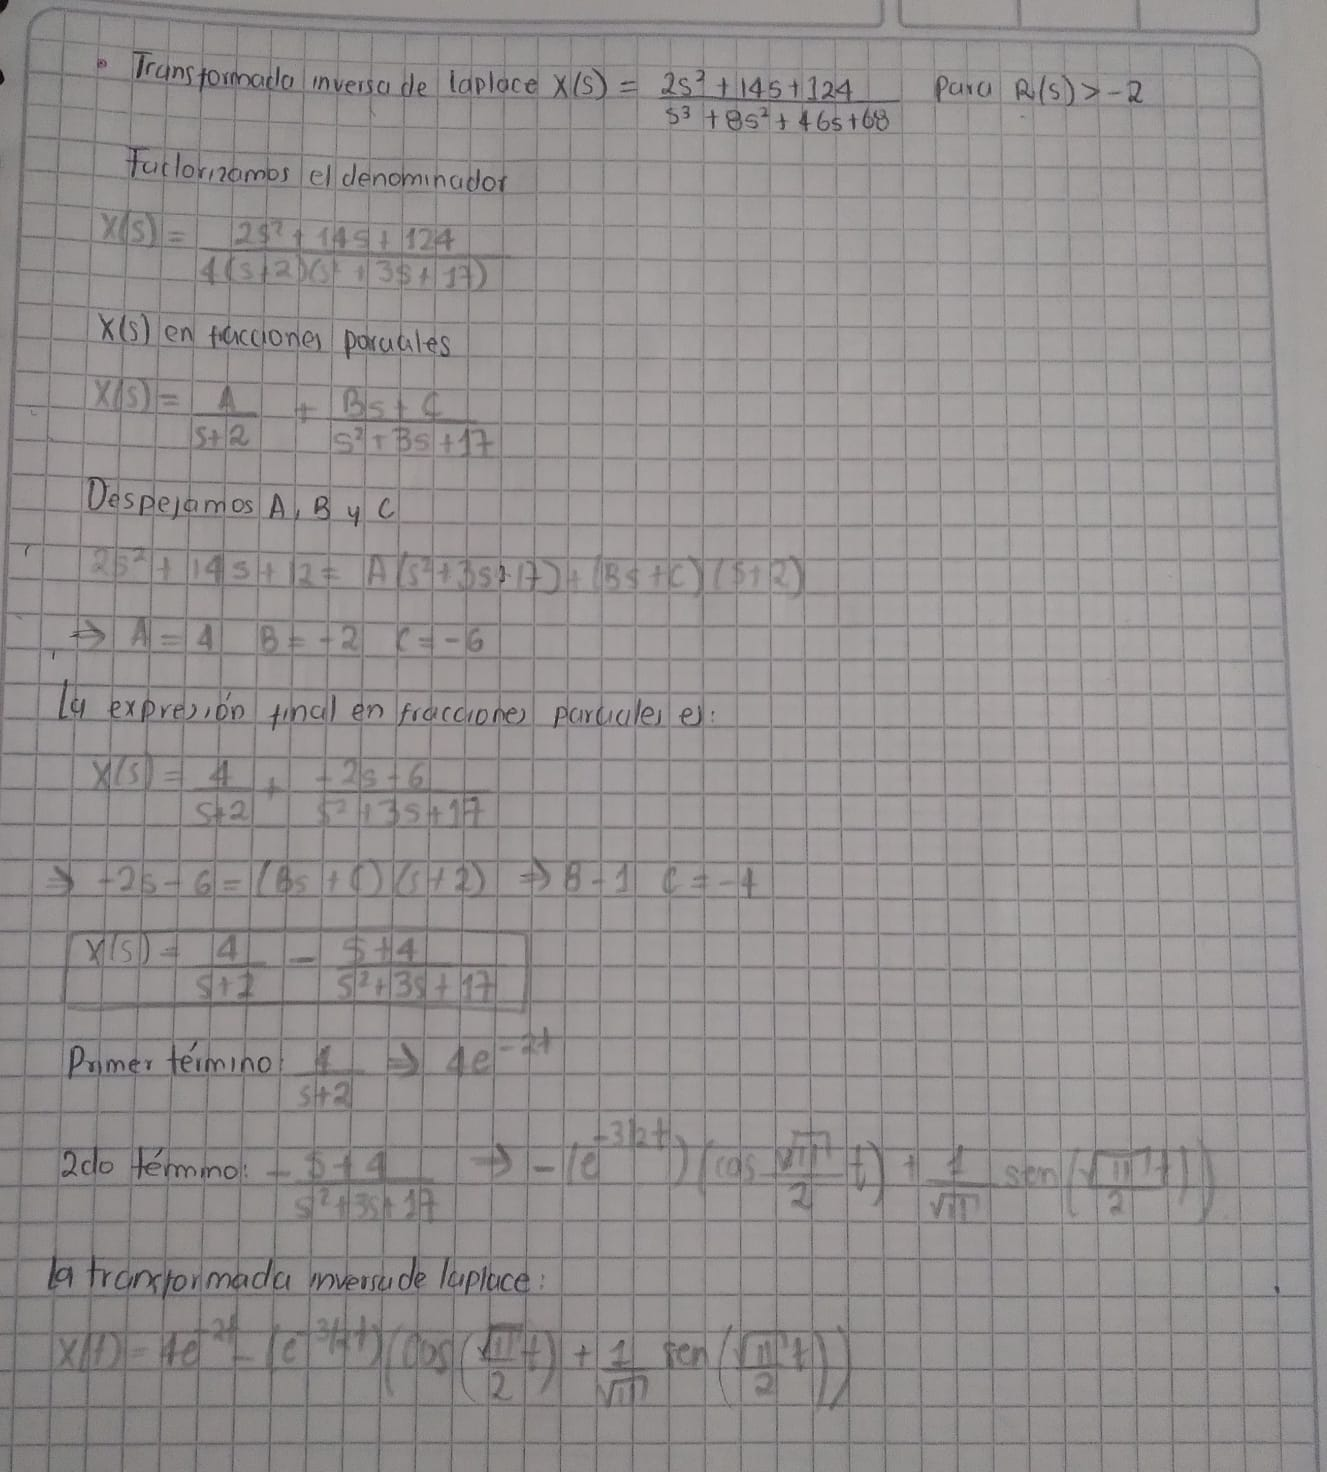

* Obtener la transformada inversa de Laplace de
    \begin{equation}
    X(s) = \frac{1}{(s+1)(s+2)^2} \qquad \text{for } \Re \{ s \} \geq -1
    \end{equation}
    manualmente. Comprobar los resultados utilizando `SymPy`.


  **SOLUCIÓN**

  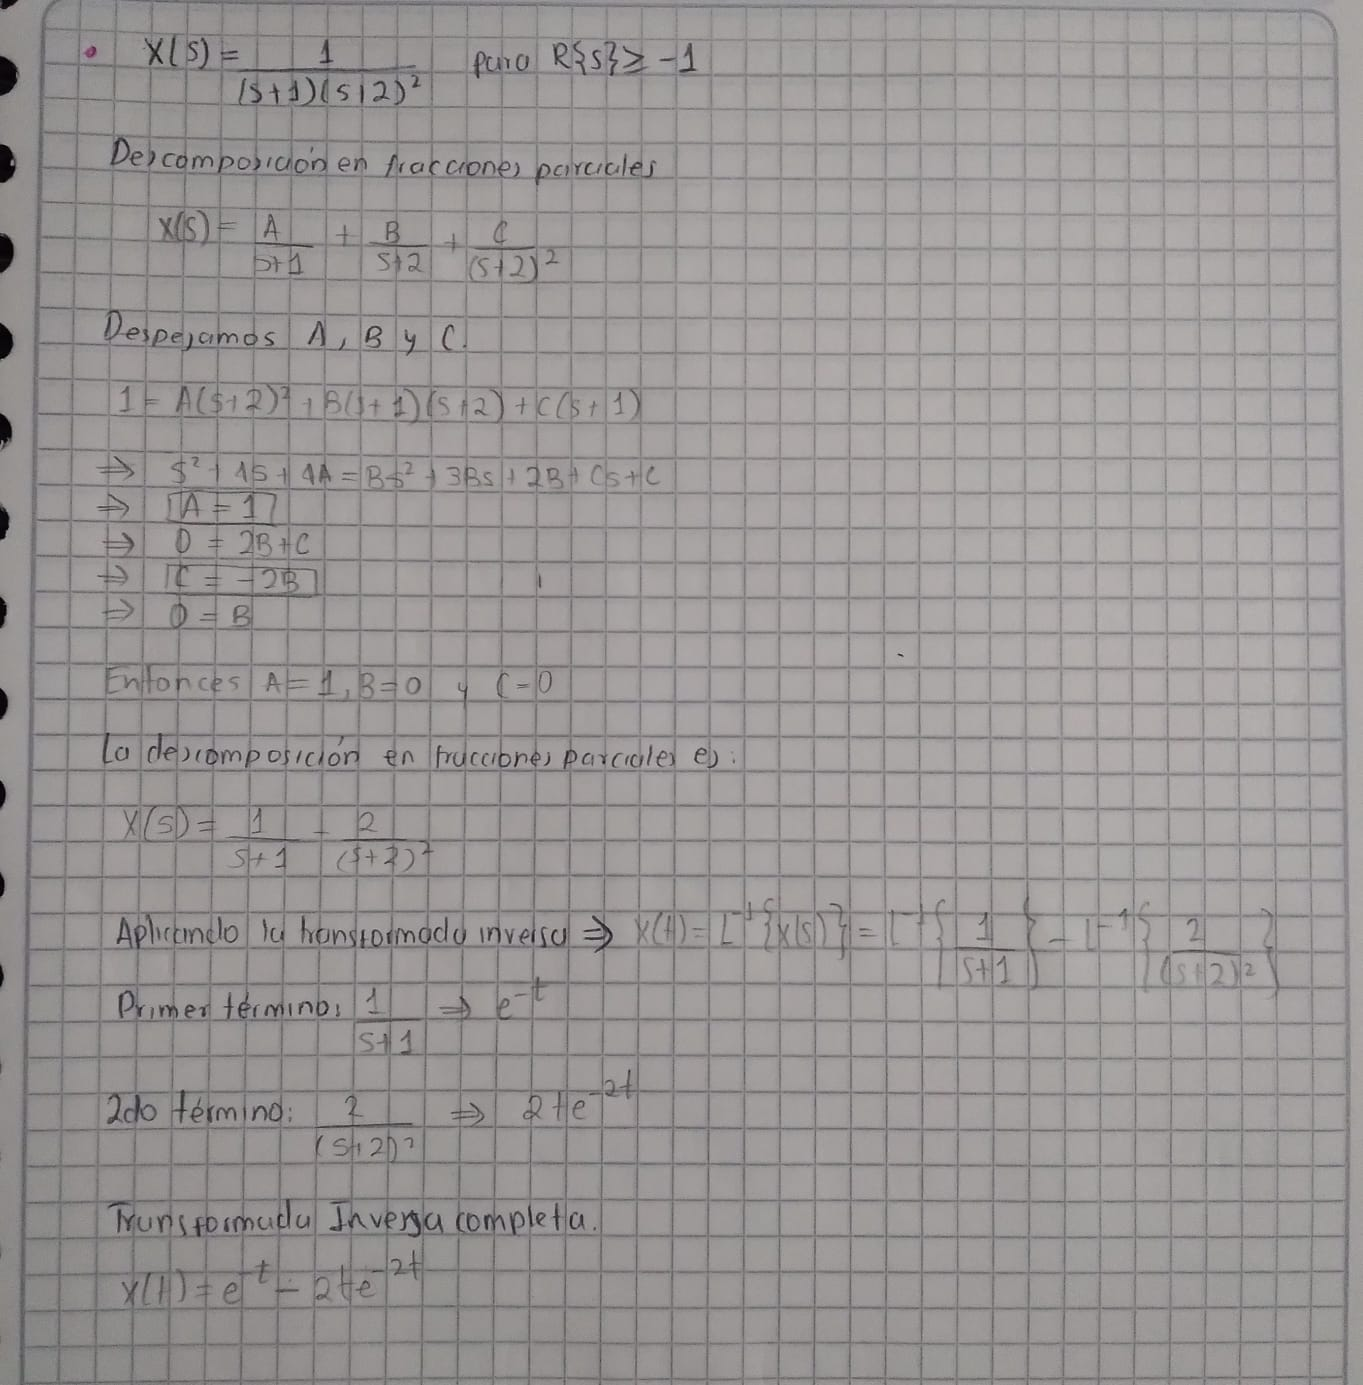

***COMPROBACIÓN DE RESULTADOS UTILIZANDO SYMPY***

In [32]:
sym.inverse_laplace_transform(X, s, t).simplify()

⎛       t⎞  -2⋅t     
⎝2⋅t + ℯ ⎠⋅ℯ    ⋅θ(t)

Haciendo uso de la función que hace el calculo directo de la transformada inversa de laplace se obtuvo el mismo resultado que en el calculo manual, solo que aquí se encuentra expresado de otra manera.  

También se hizo la simulación por partes y también se obtuvo el mismo resultado.

In [7]:
%matplotlib inline
import sympy as sym
sym.init_printing()

s = sym.symbols('s', complex=True)
t = sym.symbols('t', real=True)

X = (1)/((s+1)*(s+2)**2)
X

       1        
────────────────
               2
(s + 1)⋅(s + 2) 

In [8]:
poles = sym.roots(sym.denom(X))
poles

{-2: 2, -1: 1}

In [22]:
 s, A, B, C = sym.symbols('s A B C', real=True)
#expresión en fracciones parciales
Xp = (A/(s+1)) + (B/(s+2)) + (C/(s+2)**2)
#resolver coeficientes por igualación de expresiones
coeffs = sym.solve(sym.Eq(X, Xp), (A, B, C))
coeffs

{A: 1, B: 0, C: 2}

In [23]:
Xp = Xp.subs(coeffs)
Xp

   2         1  
──────── + ─────
       2   s + 1
(s + 2)         

In [28]:
x1 = sym.inverse_laplace_transform(Xp.args[0], s, t)#transformada inversa del primer componente
x1

 -t     
ℯ  ⋅θ(t)

In [29]:
x2 = sym.inverse_laplace_transform(Xp.args[1], s, t) #trasformada inversa del segundo componente
x2

     -2⋅t     
2⋅t⋅ℯ    ⋅θ(t)

In [30]:
#Transformada Inversa completa
x = x1 + x2
x

     -2⋅t         -t     
2⋅t⋅ℯ    ⋅θ(t) + ℯ  ⋅θ(t)